# Vienna tutorial notebook

This notebook is meant as a tutorial to the Vienna ISAPP Summer school. We'll do some basic kinematics calculations and use a few darkELF functions. See 2104.12786 for a description of the physics behind the code.

Comments meant to assist you have a regular white font

<font style='background :lightblue'> Exercises which you can do have a light blue background, like this one  </blue>

In [2]:
%matplotlib inline

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
# if vienna_tutorial.ipynb is in the darkelf examples folder, it suffices to comment out the 2 lines below
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")


# loading the package
from darkelf import darkelf, targets


## Scattering kinematics

<font style='background :lightblue'>1) For a given momentum transfer k and dark matter velocity v, what is the maximum energy transfer (omega) which is consistent with energy and momentum conservation? (Assuming that the collision is elastic on the dark matter side.) </blue>

<font style='background :lightblue'> 2) Plot the boundary of the phase space derived in the previous part for mX=1 MeV, mX=10 MeV, mX=100 MeV and mX=1 GeV, assuming v=10^-3. Overlay this with the plot of the ELF. What can you conclude for DM-electron scattering? </blue>

## Using darkELF

Check which data grids are available for the material of interest.

In [3]:
targets.files("Si")

Available configuration files: 
	 Si.yaml
 
Available data for epsilon: 
	 Si_Migdal_FAC.dat
	 Si_mermin.dat
	 Si_gpaw_noLFE.dat
	 Si_gpaw_withLFE.dat
	 Si_epsphonon_theory6K.dat
	 Si_epsphonon_data6K.dat
	 Si_Zion.dat


Specify a "filename" for the ELF for omega > electron band gap and a "phonon_filename" for the ELF below the electron bandgap, if desired.

We create a darkelf object for Si, where we specify a filename where the ELF is retrieved. Here we will use the result from the GPAW calculation. The code prints out a message with the references to the paper(s) which were important for the ELF calculation for this particular material.

In [4]:
Si = darkelf(target='Si',filename='Si_gpaw_withLFE.dat')

 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000


### dielectric functions

Real part

In [5]:
?Si.eps1

Signature: Si.eps1(omega, k, method='grid')
Docstring:
Real part of epsilon(omega,k)

Inputs
------
omega: float or array
    energy in eV
k: float
    energy in eV
method = "grid" (using the grid loaded in filename), "Lindhard" (free electron gas), or "phonon"
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/epsilon.py
Type:      method


In [6]:
print(Si.eps1(5.0,1000.))
print(Si.eps1(5.0,1000.,method="Lindhard"))
print(Si.eps1([5.0,10],1000.)) # can be broadcasted over a list of omega

9.860192398495757
6.539557197348618
[ 9.8601924  -1.71897475]


imaginary part

In [7]:
?Si.eps2

Signature: Si.eps2(omega, k, method='grid')
Docstring:
Imaginary part of epsilon(omega,k)

Inputs
------
omega: float or array
    energy in eV
k: float
    energy in eV
method = "grid" (using the grid loaded in filename), "Lindhard" (free electron gas), or "phonon"
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/epsilon.py
Type:      method


In [8]:
print(Si.eps2(5.0,1000.))
print(Si.eps2(5.0,1000.,method="Lindhard"))
print(Si.eps2([5.0,10],1000.)) # can be broadcasted over a list of omega

4.160907627999158
19.059927007299258
[4.16090763 2.08414923]


ELF

In [9]:
?Si.elf

Signature: Si.elf(omega, k, method='grid')
Docstring:
Energy loss function Im(-1/eps(omega,k))

Inputs
------
omega: float or array
    energy in eV
k: float
    energy in eV
method = "grid" (using the grid loaded in filename), "Lindhard" (free electron gas), or "phonon"
File:      ~/Documents/work/projects/DM_stuff/darkELF_public/darkelf/epsilon.py
Type:      method


In [10]:
print(Si.elf(5.0,1000.))
print(Si.elf(5.0,1000.,method="Lindhard"))
print(Si.elf([5.0,10],1000.)) # can be broadcasted over a list of omega

0.0363282092738552
0.0469402423105601
[0.03632821 0.28555653]


### finite k, electron regime 

This limit is relevant for scattering. We use here the Lindhard result, which is a rough but fast approximation but has the main features we want. Produce a grid of the ELF in k and omega space, and make a contour plot.

In [66]:
kvals = np.linspace(10,1.5e4,400)*1e-3
ovals = np.linspace(0.01,100,160)
Nomega = len(ovals)
Nk = len(kvals)

z1_grid = np.zeros((Nomega,Nk))
z2_grid = np.zeros((Nomega,Nk))
ELF_gpaw = np.zeros((Nomega,Nk))

for j in range(Nk):
    for i in range(Nomega):
        ELF_gpaw[i][j] = Si.elf(ovals[i],kvals[j]*1e3,method="Lindhard")

If you prefer to plot with mathematica or another software, you can use np.savetxt to export the data tables to a txt format.

https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


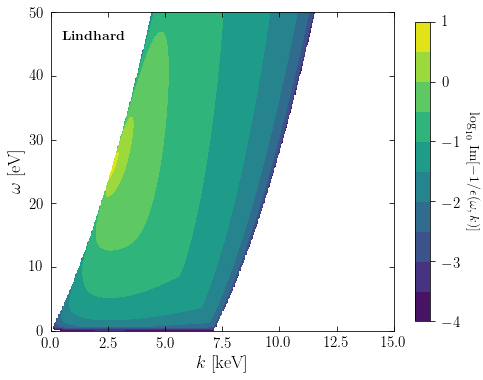

In [75]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5.5)
fig.set_figwidth(7)

levels = np.linspace(-4,1,11)
img2=ax.contourf(kvals,ovals,np.log10(ELF_gpaw),levels,origin='lower',
                      extent = [min(kvals),max(kvals),min(ovals),max(ovals)])

cb=fig.colorbar(img2,anchor=(2.1,1.05),shrink=0.94)
cb.set_label("$\log_{10}$ Im[$-1/\epsilon(\omega, k)]$",rotation=-90,labelpad=15)


ax.set_ylim([0,50])
ax.set_xlim([0,15])
ax.set_xlabel('$k$ [keV]',fontsize=18)
ax.set_ylabel('$\omega$ [eV]',fontsize=18)
ax.tick_params(bottom=True,right=True,top=True,direction='in',which='both')
ax.text(0.5,45.5,r'{\bf Lindhard}',color='black')

fig.tight_layout()

<font style='background :lightblue'>Overlay the contour plot with the results of the previous exercise </blue>

<font style='background :lightblue'> What do you learn? Now switch over to the GPAW calculation, by removing the "method=Lindhard" command in the "Si.elf" function </blue>

<font style='background :lightblue'> Where is the ELF intensity the highest? What is the physics behind this region?

DarkELF can directly calculate the differential and total cross sections. To compare different methods, let us make a darkelf object for each method

In [93]:
mX=1e8
Si_gpaw = darkelf(target='Si',mX=mX,filename="Si_gpaw_withLFE.dat")
Si_mermin = darkelf(target='Si',mX=mX,filename="Si_mermin.dat")

Ge_gpaw = darkelf(target='Ge',mX=mX,filename="Ge_gpaw_withLFE.dat")
Ge_mermin = darkelf(target='Ge',mX=mX,filename="Ge_mermin.dat")

 .... Loading files for Si
Loaded Si_gpaw_withLFE.dat for epsilon in electron regime
electronic ELF taken or calculated from J. Enkovaara et al.,Electronic structure calculations with GPAW: a real-space implementation of the projector augmented-wave method,Journal of Physics:Condensed Matter22(2010) 253202.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Zion(k) for Migdal calculation taken or calculated from: P. J. Brown, A. G. Fox, E. N. Maslen, M. A. OKeefe,and B. T. M. Willis, “Intensity of diffracted intensities,” in International Tables for Crystallography (American Cancer Society, 2006) Chap. 6.1, pp. 554–595, https://onlinelibrary.wiley.com/doi/pdf/10.1107/97809553602060000
 .... Loading files for Si
Loaded Si_mermin.dat for epsilon in electron regime
electronic ELF taken or calculated from Y. Sun, H. Xu, B. Da, S.-f. Mao and Z.-j. Ding, Calculations of Energy-Loss Function for 26 Materials, Chinese Journal of Chemical Physics9(2016) 663.
Warning! e

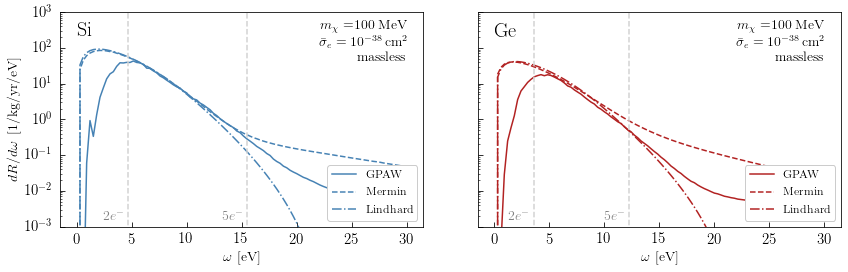

In [94]:
fig, axs = plt.subplots(1,2,figsize=(12, 4),sharey=True)

Si_2e_threshold=Si.E_gap+Si.e0
Ge_2e_threshold=Ge.E_gap+Ge.e0

Si_5e_threshold=Si.E_gap+4.0*Si.e0
Ge_5e_threshold=Ge.E_gap+4.0*Ge.e0

Si_mermin.update_params(mX=1e8,mediator='massless')
Si_gpaw.update_params(mX=1e8,mediator='massless')
Ge_mermin.update_params(mX=1e8,mediator='massless')
Ge_gpaw.update_params(mX=1e8,mediator='massless')

olist=np.linspace(0.0,30.0,100)

# Si
Rlist=Si_gpaw.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,color="steelblue",label="GPAW")

Rlist=Si_mermin.dRdomega_electron(olist,method="grid")
axs[0].plot(olist,Rlist,"--",color="steelblue",label="Mermin")

Rlist=Si_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[0].plot(olist,Rlist,"-.",color="steelblue",label="Lindhard")

axs[0].plot([Si_2e_threshold,Si_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[0].plot([Si_5e_threshold,Si_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[0].text(0,2e2,"Si",fontsize=20)
axs[0].text(30,3e2,"$m_\chi=$"+str(int(Si.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(30,4e1,r"massless",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[0].text(Si_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(Si_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")

axs[0].set_yscale("Log")
axs[0].set_ylim([1e-3,1e3])
axs[0].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[0].tick_params(direction='in',which='both')
axs[0].set_xlabel("$\omega$ [eV]")
axs[0].set_ylabel("$dR/d\omega\,$ [1/kg/yr/eV]")


# Ge
Rlist=Ge_gpaw.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,color="Firebrick",label="GPAW")

Rlist=Ge_mermin.dRdomega_electron(olist,method="grid")
axs[1].plot(olist,Rlist,"--",color="Firebrick",label="Mermin")

Rlist=Ge_gpaw.dRdomega_electron(olist,method="Lindhard")
axs[1].plot(olist,Rlist,"-.",color="Firebrick",label="Lindhard")

axs[1].plot([Ge_2e_threshold,Ge_2e_threshold],[1e-5,1e3],"--",color="lightgray")
axs[1].plot([Ge_5e_threshold,Ge_5e_threshold],[1e-5,1e3],"--",color="lightgray")

axs[1].text(0,2e2,"Ge",fontsize=20)
axs[1].text(30,3e2,"$m_\chi=$"+str(int(Ge.mX*1e-6))+" MeV",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,1e2,r"$\bar \sigma_e=10^{-38}\,\mathrm{cm}^{2}$",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(30,4e1,r"massless",fontsize=14,backgroundcolor="white",horizontalalignment="right")
axs[1].text(Ge_2e_threshold-0.4,1.5e-3,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].text(Ge_5e_threshold-0.4,1.5e-3,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].legend(fontsize=12,loc="lower right",framealpha=1.0)
axs[1].tick_params(direction='in',which='both')
axs[1].set_xlabel("$\omega$ [eV]")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.15)


### Migdal effect

DarkELF can compute the ionization probability for the Migdal effect, using the ELF and using the Ibe method

In [92]:
Entest=100.
omlist=np.linspace(1.0,30.0,50) # list of electronic excitation energies, used for plotting throughout this notebook

dPdomega_Si_gpaw=Si_gpaw.dPdomega(omlist,Entest,method="grid")
dPdomega_Si_mermin=Si_mermin.dPdomega(omlist,Entest,method="grid")
dPdomega_Si_lindhard=Si_gpaw.dPdomega(omlist,Entest,method="Lindhard")
dPdomega_Si_ibe=Si_gpaw.dPdomega(omlist,Entest,method="Ibe")

dPdomega_Ge_gpaw=Ge_gpaw.dPdomega(omlist,Entest,method="grid")
dPdomega_Ge_mermin=Ge_mermin.dPdomega(omlist,Entest,method="grid")
dPdomega_Ge_lindhard=Ge_gpaw.dPdomega(omlist,Entest,method="Lindhard")
dPdomega_Ge_ibe=Ge_gpaw.dPdomega(omlist,Entest,method="Ibe")


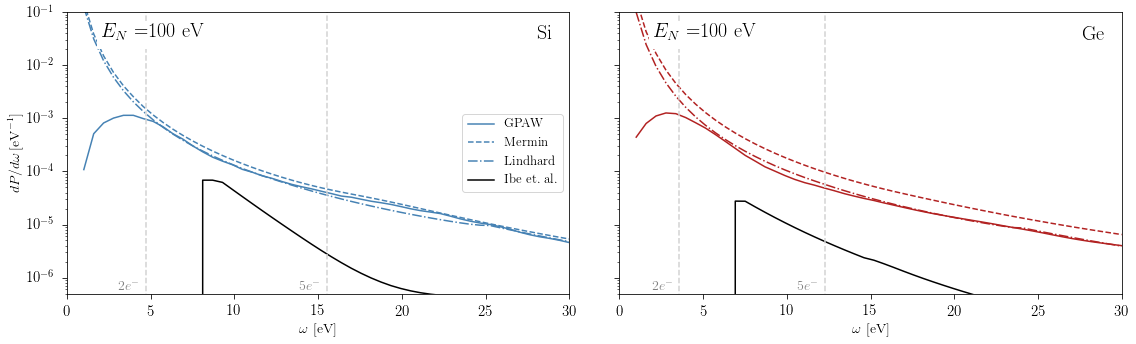

In [95]:
Si_2e_threshold=Si_gpaw.E_gap+Si_gpaw.e0
Ge_2e_threshold=Ge_gpaw.E_gap+Ge_gpaw.e0

Si_5e_threshold=Si_gpaw.E_gap+4.0*Si_gpaw.e0
Ge_5e_threshold=Ge_gpaw.E_gap+4.0*Ge_gpaw.e0

fig, axs = plt.subplots(1,2,figsize=(16,5),sharey=True)

axs[0].plot(omlist,dPdomega_Si_gpaw,label="GPAW",color="Steelblue")
axs[0].plot(omlist,dPdomega_Si_mermin,"--",label="Mermin",color="Steelblue")
axs[0].plot(omlist,dPdomega_Si_lindhard,"-.",label="Lindhard",color="Steelblue")
axs[0].plot(omlist,dPdomega_Si_ibe,"-",label="Ibe et.~al.",color="Black")

axs[0].plot([Si_2e_threshold,Si_2e_threshold],[1e-7,1e0],"--",color="lightgray")
axs[0].plot([Si_5e_threshold,Si_5e_threshold],[1e-7,1e0],"--",color="lightgray")

axs[0].text(Si_2e_threshold-0.4,0.6e-6,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(Si_5e_threshold-0.4,0.6e-6,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[0].text(29,3e-2,"Si",fontsize=20,horizontalalignment="right")
axs[0].text(2,3e-2,"$E_N=$"+str(int(Entest))+" eV",fontsize=20,backgroundcolor="white",horizontalalignment="left")

axs[0].set_yscale("Log")
axs[0].set_xlim([0,30])
axs[0].set_ylim([5e-7,1e-1])
axs[0].set_xlabel("$\omega$ [eV]")
axs[0].set_ylabel("$dP/d\omega\, [\mathrm{eV}^{-1}]$")
axs[0].legend(fontsize=13,loc="center right")

axs[1].plot(omlist,dPdomega_Ge_gpaw,label="GPAW",color="Firebrick")
axs[1].plot(omlist,dPdomega_Ge_mermin,"--",label="Mermin",color="Firebrick")
axs[1].plot(omlist,dPdomega_Ge_lindhard,"-.",label="Lindhard",color="Firebrick")
axs[1].plot(omlist,dPdomega_Ge_ibe,"-",label="Ibe et.~al.",color="Black")

axs[1].plot([Ge_2e_threshold,Ge_2e_threshold],[1e-7,1e3],"--",color="lightgray")
axs[1].plot([Ge_5e_threshold,Ge_5e_threshold],[1e-7,1e3],"--",color="lightgray")

axs[1].text(29,3e-2,"Ge",fontsize=20,horizontalalignment="right")
axs[1].text(2,3e-2,"$E_N=$"+str(int(Entest))+" eV",fontsize=20,backgroundcolor="white",horizontalalignment="left")

axs[1].text(Ge_2e_threshold-0.4,0.6e-6,"$2e^-$",fontsize=14,color="gray",horizontalalignment="right")
axs[1].text(Ge_5e_threshold-0.4,0.6e-6,"$5e^-$",fontsize=14,color="gray",horizontalalignment="right")

axs[1].set_xlim([0,30])
axs[1].set_xlabel("$\omega$ [eV]")

fig.tight_layout()
fig.subplots_adjust(wspace = 0.1)


We see quite a large difference with the Ibe method, which is due to the effects we discussed on Monday

### Photon scattering and DM absorption

DarkELF also computes scattering off optical phonons, as well as absorption rates. See darkelf_phonon.ipynb and darkelf_absorption.ipynb in the examples notebook if you are interested.